# *1 - Hands-on TensorFlow + Keras + LENET-5*

Implement and train several times using keras API your own LENET-5 implementation. Notice that you will be urged to derive an implementation somehow distinct to the original proposal of LeCun et al.  

## *1.1 - Load tensor flow*

In [1]:
import tensorflow as tf

## *1.2 - Dataset preparation*

### *Import and prepare dataset*

Modified NIST (MNIST) is a database of handwritten digits. It encompasses a training set of 60,000 examples, and a test set of 10,000 examples. Images available in keras library are 28x28x1-sized.

The final part of the following code normalizes the training data to $[0,1]$.

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() 
print ("Training set info:",x_train.shape)
print ("Train target info:",y_train.shape)
print ("Test set info:",x_test.shape)
print ("Test target info:",y_test.shape)

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 2s 0us/step
Training set info: (60000, 28, 28)
Train target info: (60000,)
Test set info: (10000, 28, 28)
Test target info: (10000,)


### *Show sample images*


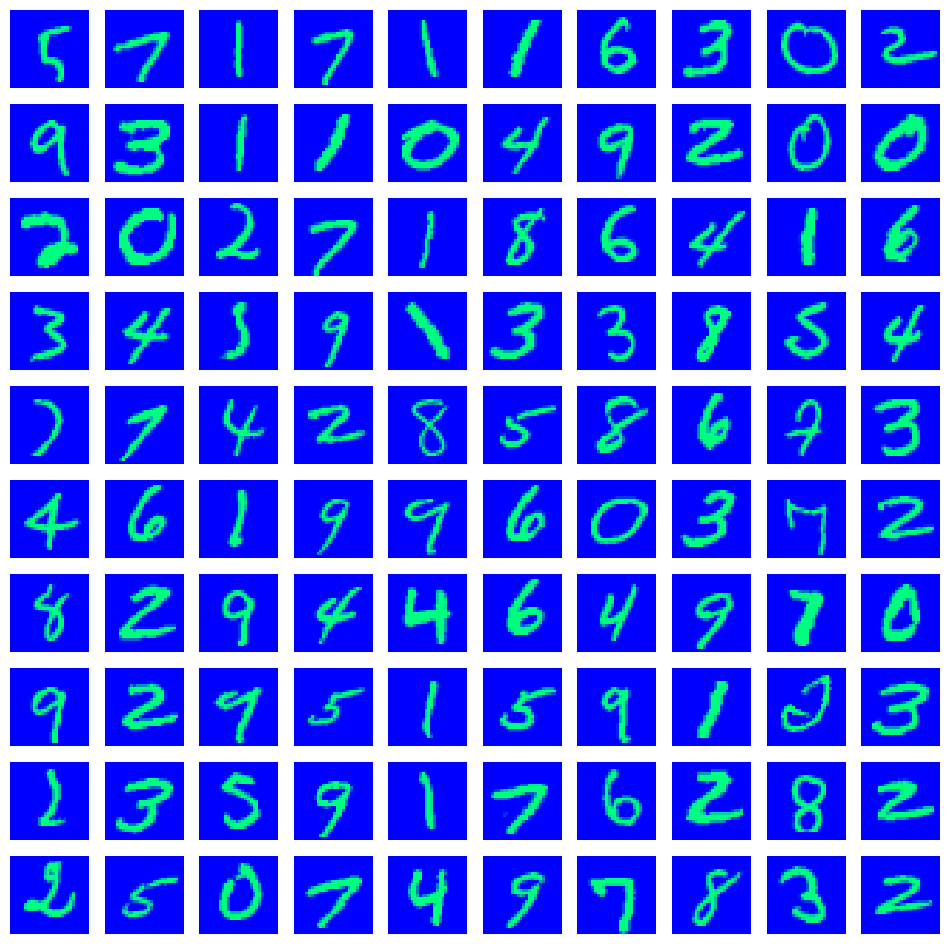

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for i in range(100,200):
  ax = plt.subplot(10, 10, i-99)
  plt.axis("off")
  plt.imshow(x_train_norm[i].reshape(28,28),interpolation='nearest')
  plt.winter()

### *1.3 - Create and Initialize LENET-5 Architecture*

The code bellow implements a single-hidden-layer perceptron using Keras functional architecture. 



In [4]:
import tensorflow as tf

# Here it goes a functional implementation of a MLP
def mymlp_functional( hidd_neu = 128, hidd_act='relu',do_freq=0.2):
  inputs = tf.keras.layers.Input(shape=(28,28))
  x = tf.keras.layers.Flatten(input_shape=(28, 28))(inputs)
  x = tf.keras.layers.Dense(hidd_neu, activation=hidd_act) (x)
  x = tf.keras.layers.Dropout(do_freq) (x)
  outputs = tf.keras.layers.Dense(10, activation='softmax') (x)
  return tf.keras.models.Model(inputs, outputs, name='mymlp')


**Task 1** Implement using the Keras functional API the  [LENET-5 architecture](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

Notice that the LETNET input layer size is 32 x 32 while MNIST images dimensions are 28 x 28. To solve such mismatch, include, after the input layer, a zeros padding layer to insert 2 zero-pixels at each border. Use [ZeroPadding2D](https://keras.io/api/layers/reshaping_layers/zero_padding2d/)  function. 

For the 2D-convolutional and maxpooling layers use the Keras functions [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/) and [MaxPool2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/), respectfully.

Also, notice that the original LENET-5 has a Gaussian layer on its output, substitute it by a Dense layer with softmax activation. In addition, incorporate [batch normalization](https://keras.io/api/layers/normalization_layers/batch_normalization/) and dropout to your implementation. 

For further information, consult [Keras layers API ](https://keras.io/api/layers/)   

In [5]:
import tensorflow as tf

def lenet5():
    inputs = tf.keras.layers.Input(shape=(28, 28, 1))
    x = tf.keras.layers.ZeroPadding2D(padding=(2, 2))(inputs)
    
    # Convolutional Layer 1
    x = tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='tanh')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    # Convolutional Layer 2
    x = tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='tanh')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    x = tf.keras.layers.Flatten()(x)
    
    # Fully Connected Layers
    x = tf.keras.layers.Dense(120, activation='tanh')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    x = tf.keras.layers.Dense(84, activation='tanh')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='lenet5')
    
    return model


**Task 2** Calculate the number of parameters of the above model. Compare the estimatad values to the one provided by 

```
Model.summary()
```



In [15]:
"""
Convolutional Layer 1 = (5*5*1+1)*6 = 156
Convolutional Layer 2 = (5*5*6+1)*16 = 2416
Fully Connected Layer 1 = (400+1)*120 = 48120
Fully Conected Layer 2 = (120 +1)*84 = 10164
outputs = (84+1)*10 = 850
Total = 61.706
"""
model.summary()


Model: "lenet5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 zero_padding2d_28 (ZeroPadd  (None, 32, 32, 1)        0         
 ing2D)                                                          
                                                                 
 conv2d_56 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 batch_normalization_112 (Ba  (None, 14, 14, 6)        24        
 tchNormalization)                                               
                                                            

**Use this space to answer Task 2**

##*1.4 - Network training*

Remember the training process workflow:
1. Architecture setup
2. Network instantiation
3. Parameters initialization.
4. Training graph setup
5. Paramenters optimization
6. Evaluation 

Details can be found in the [keras documentation](https://keras.io/api/models/model_training_apis/). 

**Task 3**: Make a evaluation of the number of training epochs. Use that 'optimal' number of epochs in the remaining tasks.

Epoch 1/25
1688/1688 [==============================] - 15s 7ms/step - loss: 0.5061 - accuracy: 0.8488 - val_loss: 0.0877 - val_accuracy: 0.9712
Epoch 2/25
1688/1688 [==============================] - 11s 7ms/step - loss: 0.2071 - accuracy: 0.9423 - val_loss: 0.0627 - val_accuracy: 0.9818
Epoch 3/25
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1580 - accuracy: 0.9565 - val_loss: 0.0496 - val_accuracy: 0.9863
Epoch 4/25
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1353 - accuracy: 0.9636 - val_loss: 0.0438 - val_accuracy: 0.9882
Epoch 5/25
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1176 - accuracy: 0.9680 - val_loss: 0.0453 - val_accuracy: 0.9872
Epoch 6/25
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1082 - accuracy: 0.9704 - val_loss: 0.0384 - val_accuracy: 0.9898
Epoch 7/25
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0949 - accuracy: 0.9738 - val_loss: 0.0387 - val_ac

<Figure size 1200x400 with 0 Axes>

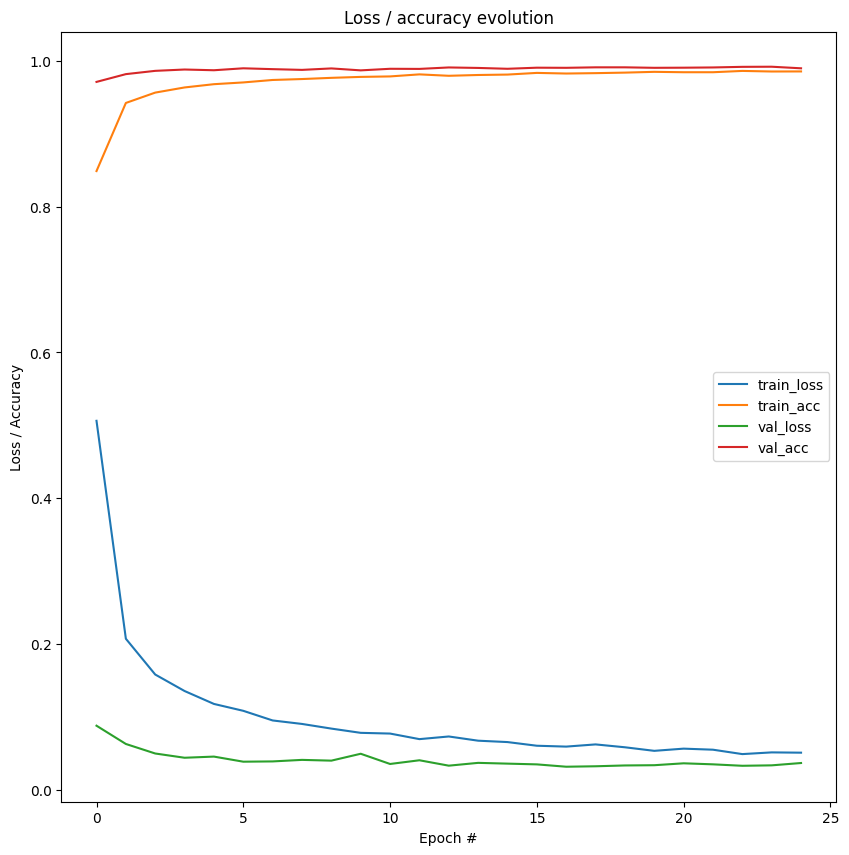

In [ ]:
model = lenet5()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the number of training epochs
num_epochs = 25

# Train the model
H = model.fit(x_train_norm, y_train, epochs=num_epochs, validation_split=0.1)

# Plot the loss/accuracy evolution graph
plt.figure(figsize=(12, 4))

# Plot the training loss
plt.figure(figsize=(10, 10))
plt.plot( H.history["loss"], label="train_loss")
plt.plot( H.history["accuracy"], label="train_acc")
plt.plot( H.history["val_loss"], label="val_loss")
plt.plot( H.history["val_accuracy"], label="val_acc")
plt.title("Loss / accuracy evolution")
plt.xlabel("Epoch #")
plt.ylabel("Loss / Accuracy")
leg=plt.legend()


Put your accuracy results for training and test data in a table inside the next cell. Remind the 'best' number of epochs. This value will be used in the following experiments. 

Epochs | Training Accuracy | Test Accuracy 
------------- | ------------- | -------------
1  | 0.8488   | 0.9712
2  | 0.9423   | 0.9818
3  | 0.9565   | 0.9863
4  | 0.9636   | 0.9882
5  | 0.9680   | 0.9872
6  | 0.9704   | 0.9898
7  | 0.9738   | 0.9887
8  | 0.9751   | 0.9877
9  | 0.9767   | 0.9897
10 | 0.9780   | 0.9870
11 | 0.9787   |	0.9892
12 | 0.9815   |	0.9890
13 | 0.9796   |	0.9910
14 | 0.9806   |	0.9903
15 | 0.9812   |	0.9892
16 | 0.9835   |	0.9907
17 | 0.9827   |	0.9905
18 | 0.9832   |	0.9912
19 | 0.9839   |	0.9912
20 | 0.9850   |	0.9905
21 | 0.9844   |	0.9907
22 | 0.9844   |	0.9910
23 | 0.9862   |	0.9918
24 | 0.9854   |	0.9920
25 | 0.9855   |	0.9898  

**Task 4**: Train from the scratch a LENET-5 network through the previously  determined number of epochs 

In [ ]:
model = lenet5()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
History = model.fit(x_train_norm, y_train, epochs=24, validation_split=0.1)

Epoch 1/24
1688/1688 [==============================] - 23s 7ms/step - loss: 0.3726 - accuracy: 0.8872 - val_loss: 0.0830 - val_accuracy: 0.9740
Epoch 2/24
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1510 - accuracy: 0.9560 - val_loss: 0.0511 - val_accuracy: 0.9837
Epoch 3/24
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1174 - accuracy: 0.9660 - val_loss: 0.0507 - val_accuracy: 0.9845
Epoch 4/24
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1009 - accuracy: 0.9710 - val_loss: 0.0443 - val_accuracy: 0.9878
Epoch 5/24
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0900 - accuracy: 0.9750 - val_loss: 0.0418 - val_accuracy: 0.9885
Epoch 6/24
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0845 - accuracy: 0.9760 - val_loss: 0.0438 - val_accuracy: 0.9882
Epoch 7/24
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0782 - accuracy: 0.9776 - val_loss: 0.0404 - val_ac

##*1.5 - Rigorous evaluation*
Tasks 5 to 10 will introduce yoursel to a more thorought evaluation of the network trained in **task 4**. It is a really important need for ensuring network quality.

**Task 5**: Obtain the test set [confusion matrix](http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html) for the above trained network.

 

313/313 [==============================] - 1s 2ms/step


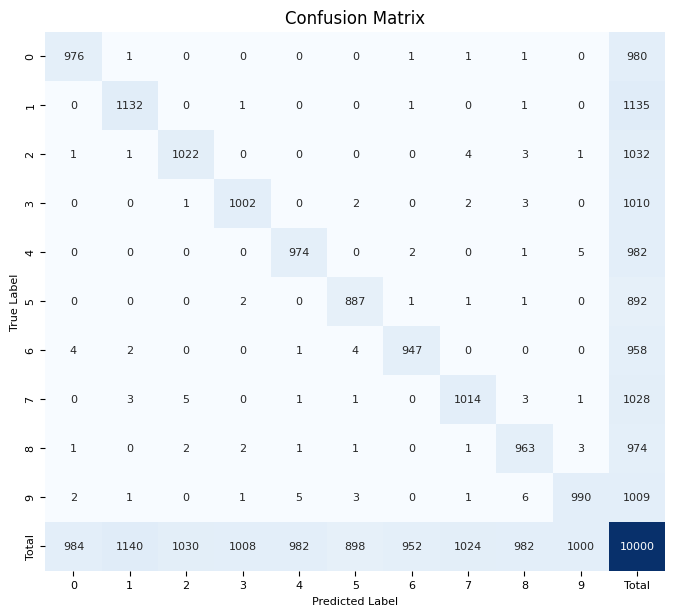

In [ ]:

import seaborn as sns
import matplotlib. pyplot as plt

import numpy as np

# Normalize and reshape the test set
x_test_norm = x_test / 255.0
x_test_norm = x_test_norm.reshape(-1, 28, 28, 1)

# Predict labels for the test set
y_pred = model.predict(x_test_norm)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Add a Total column to the confusion matrix
total_column = np.sum(cm, axis=1)
cm_with_total = np.column_stack((cm, total_column))

# Add a Total row to the confusion matrix
total_row = np.append(np.sum(cm, axis=0), np.sum(cm))
cm_with_total = np.vstack((cm_with_total, total_row.reshape(1, -1)))

# Plot the confusion matrix with Total column and row
plt.figure(figsize=(8, 7))
sns.heatmap(cm_with_total, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 8})

# Get the axis objects
ax = plt.gca()

# Set the last column label to 'Total'
ax.set_xticklabels(list(range(10)) + ['Total'], fontsize=8)

# Set the last row label to 'Total'
ax.set_yticklabels(list(range(10)) + ['Total'], fontsize=8)

# Set the axis labels, title, and font sizes
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label', fontsize=8)
plt.ylabel('True Label', fontsize=8)

# Show the plot
plt.show()

**Task 6**: Present the [overall accuracy](http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html)

In [ ]:
soma=np.trace(cm)
oacc=soma/10000.0
print('Overall accuracy: {:.2f}'.format(oacc*100))

Overall accuracy: 99.07


**Task 7**: Present the [errors of omission and commission](http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html)

In [ ]:
from tabulate import tabulate
total_true = np.sum(cm, axis=0)
total_true2 = np.sum(cm, axis=1)
total_predicted = np.sum(cm, axis=1)
errors_omission = ((total_true - np.diag(cm))/total_true)*100
errors_commission = ((total_predicted - np.diag(cm))/total_true2)*100
errors_table = [["Label", "Error_Omission(%)", "Errors of Commission(%)"]]
for i in range(10):
    errors_table.append([str(i), errors_omission[i], errors_commission[i]])
# Print the errors table
print(tabulate(errors_table, headers="firstrow", floatfmt=".2f"))

  Label    Error_Omission(%)    Errors of Commission(%)
-------  -------------------  -------------------------
      0                 0.81                       0.41
      1                 0.70                       0.26
      2                 0.78                       0.97
      3                 0.60                       0.79
      4                 0.81                       0.81
      5                 1.22                       0.56
      6                 0.53                       1.15
      7                 0.98                       1.36
      8                 1.93                       1.13
      9                 1.00                       1.88


**Task 8**: Present [user's  and producer's accuracy](http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html)

In [ ]:
from tabulate import tabulate
total_true = np.sum(cm, axis=0)
total_true2 = np.sum(cm, axis=1)
total_predicted = np.sum(cm, axis=1)
Producer_Accuracy = ((np.diag(cm))/total_true)*100
User_Acurracy = ((np.diag(cm))/total_true2)*100
errors_table = [["Label", "Producer_Accuracy(%)", "User_Acurracy(%)"]]
for i in range(10):
    errors_table.append([str(i), Producer_Accuracy[i], User_Acurracy[i]])
# Print the errors table
print(tabulate(errors_table, headers="firstrow", floatfmt=".2f"))

  Label    Producer_Accuracy(%)    User_Acurracy(%)
-------  ----------------------  ------------------
      0                   99.19               99.59
      1                   99.30               99.74
      2                   99.22               99.03
      3                   99.40               99.21
      4                   99.19               99.19
      5                   98.78               99.44
      6                   99.47               98.85
      7                   99.02               98.64
      8                   98.07               98.87
      9                   99.00               98.12


**Task 9**: Obtain the [Kappa]((http://gis.humboldt.edu/OLM/Courses/GSP_216_Online/lesson6-2/metrics.html))

In [ ]:
from sklearn.metrics import cohen_kappa_score
flatten_cm = cm.flatten()
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa: {:.4f}'.format(kappa))

Kappa: 0.9897


**Task 10**: Initialize and train this model 10 times and take note of the values obtained at each round.

In [13]:
for i in range(10):
  print(f"Run # {i+1}")
  print('─' * 25)
  model = lenet5()
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  History = model.fit(x_train_norm, y_train, epochs=24, validation_split=0.1)

  print("Train:")
  Train_Evaluation = model.evaluate(x_train_norm,  y_train, verbose=2)
  print("Test:")
  Test_Evaluation = model.evaluate(x_test_norm,  y_test, verbose=2)
  print('─' * 25)



Run # 1
─────────────────────────
Epoch 1/24
1688/1688 [==============================] - 16s 8ms/step - loss: 0.3764 - accuracy: 0.8842 - val_loss: 0.0823 - val_accuracy: 0.9745
Epoch 2/24
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1446 - accuracy: 0.9574 - val_loss: 0.0705 - val_accuracy: 0.9785
Epoch 3/24
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1144 - accuracy: 0.9678 - val_loss: 0.0466 - val_accuracy: 0.9845
Epoch 4/24
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0949 - accuracy: 0.9727 - val_loss: 0.0455 - val_accuracy: 0.9850
Epoch 5/24
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0902 - accuracy: 0.9749 - val_loss: 0.0392 - val_accuracy: 0.9892
Epoch 6/24
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0816 - accuracy: 0.9766 - val_loss: 0.0557 - val_accuracy: 0.9833
Epoch 7/24
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0737 - accuracy: 

Put your outcomes here in the form of a table. 

*1.6 - Optimizers*

Evaluate the impact of optimizer's choice during training process.


**Task 11**: While using the same number of training epochs as before, vary the [optimizers](https://keras.io/api/optimizers/#available-optimizers). Save the training history for each training, then plot histories of both losses and accuracies in the training set. Also compare the training and test final accuracy values obtained using each optimizer.  

Click here for [tf.keras.optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) documentation. There you may find the following variants:

  * SGD
  * RMSprop
  * Adam
  * Adadelta
  * Adagrad
  * Adamax
  * Nadam
  * Ftrl
 



Optimizer sgd
─────────────────────────
Epoch 1/24
1688/1688 [==============================] - 20s 6ms/step - loss: 0.6392 - accuracy: 0.7999 - val_loss: 0.1588 - val_accuracy: 0.9530
Epoch 2/24
1688/1688 [==============================] - 9s 6ms/step - loss: 0.2673 - accuracy: 0.9210 - val_loss: 0.1363 - val_accuracy: 0.9577
Epoch 3/24
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2016 - accuracy: 0.9410 - val_loss: 0.0736 - val_accuracy: 0.9780
Epoch 4/24
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1672 - accuracy: 0.9511 - val_loss: 0.0572 - val_accuracy: 0.9828
Epoch 5/24
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1459 - accuracy: 0.9572 - val_loss: 0.0562 - val_accuracy: 0.9842
Epoch 6/24
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1332 - accuracy: 0.9617 - val_loss: 0.0533 - val_accuracy: 0.9842
Epoch 7/24
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1198 - accur

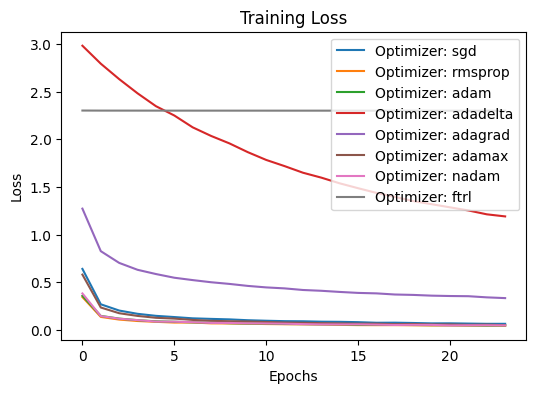

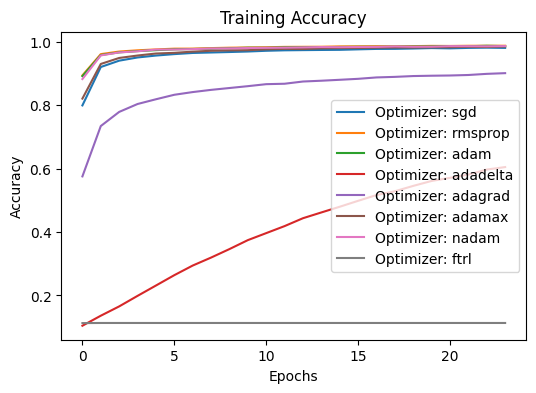

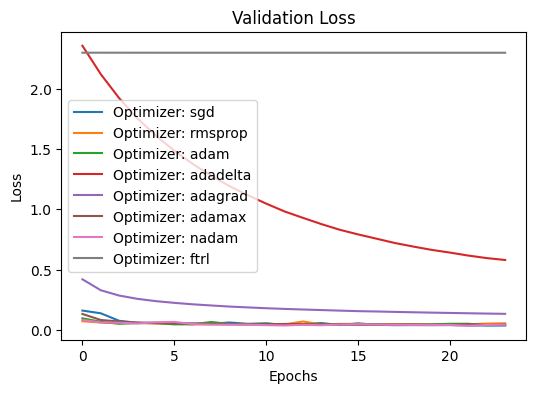

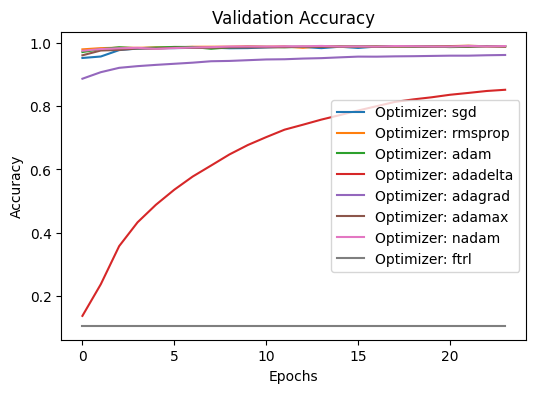

In [6]:
opt = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam','ftrl']
train_loss_histories = []
train_acc_histories = []
test_loss_histories = []
test_acc_histories = []
for i in range(len(opt)):
  print(f"Optimizer {opt[i]}")
  print('─' * 25)
  model = lenet5()
  model.compile(optimizer=opt[i], loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
  H = model.fit(x_train_norm, y_train, epochs=24, validation_split=0.1)
  train_loss_histories.append(H.history['loss'])
  train_acc_histories.append(H.history['accuracy'])
  test_loss_histories.append(H.history['val_loss'])
  test_acc_histories.append(H.history['val_accuracy'])

  print("Train:")
  Train_Evaluation = model.evaluate(x_train_norm,  y_train, verbose=2)
  print("Test:")
  Test_Evaluation = model.evaluate(x_test_norm,  y_test, verbose=2)

  # Plotting the training loss
plt.figure(figsize=(6, 4))
for i in range(len(opt)):
    plt.plot(train_loss_histories[i], label=f"Optimizer: {opt[i]}")

plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training accuracy
plt.figure(figsize=(6, 4))
for i in range(len(opt)):
    plt.plot(train_acc_histories[i], label=f"Optimizer: {opt[i]}")

plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the test loss
plt.figure(figsize=(6, 4))
for i in range(len(opt)):
    plt.plot(test_loss_histories[i], label=f"Optimizer: {opt[i]}")

plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the test accuracy
plt.figure(figsize=(6, 4))
for i in range(len(opt)):
    plt.plot(test_acc_histories[i], label=f"Optimizer: {opt[i]}")

plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Put your outcomes here in the form of a table. 

Optimizers | Final Training Accuracy | Final Test Accuracy 
------------- | ------------- | -------------
sgd  | 99.32%   | 99.03%
rsmprop  | 99.6%   | 98.9%
adam  | 99.63%   | 99.02%
adadelta  | 81.86%   | 82.43%
adagrad  | 95.06%   | 95.26%
adamax  | 99.48%   | 98.96%
nadam | 99.62%   | 98.92%
ftrl  | 11.24%   | 11.35%